# Collider Bias Demo

This Jupyter notebook contains a demonstration of some of the basic functions of the Natural Language to Bayesian Network Agent. We specifically look at the well-known phenomenon of collider bias.

## Install the Package

In [1]:
!pip install git+https://github.com/davidbkinney/NaLBaNA.git

  Cloning https://github.com/davidbkinney/NaLBaNA.git to /tmp/pip-req-build-hw7bhtnv
  Running command git clone --filter=blob:none --quiet https://github.com/davidbkinney/NaLBaNA.git /tmp/pip-req-build-hw7bhtnv
  Resolved https://github.com/davidbkinney/NaLBaNA.git to commit 976f1fd2de5c88ba18fb81d9705daab81fe737a9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for NaLBaNA: filename=nalbana-0.1.0-py3-none-any.whl size=16840 sha256=4d3e182dfa32ced8c0ab6d0170838573ebd7560b8e4e91009683a90432d538e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-382qzkc_/wheels/62/e1/ea/cb2d09e65fb5e1b0631548ddf6b610efa3102537ac04eb6ba5
Successfully built NaLBaNA


In [2]:
from NaLBaNA import bayes_net

## Connect to the OpenAI API

In [ ]:
bayes_net.input_key("Your API Key")

## Three-Variable Collider Case

Next, we generate a three-variable collider, which allows us to demonstrate the phenomenon of collider bias.

First we input our prompt.

In [4]:
prompt = """
Talent and beauty cause fame.
"""

Next, we generate a Bayesian network from that prompt.

In [5]:
bn = bayes_net.generate_bayes_net(prompt)

Extracting variables.
Variables extracted.
Generating variable values.
Variable values generated.
Defining causal graph.
Causal graph defined.
Generating conditional probability tables.
1 of 3 conditional probability tables generated (one per variable).
2 of 3 conditional probability tables generated (one per variable).
3 of 3 conditional probability tables generated (one per variable).
Conditional probability tables generated.
Bayesian network generated!


Now we visualize the causal graph.

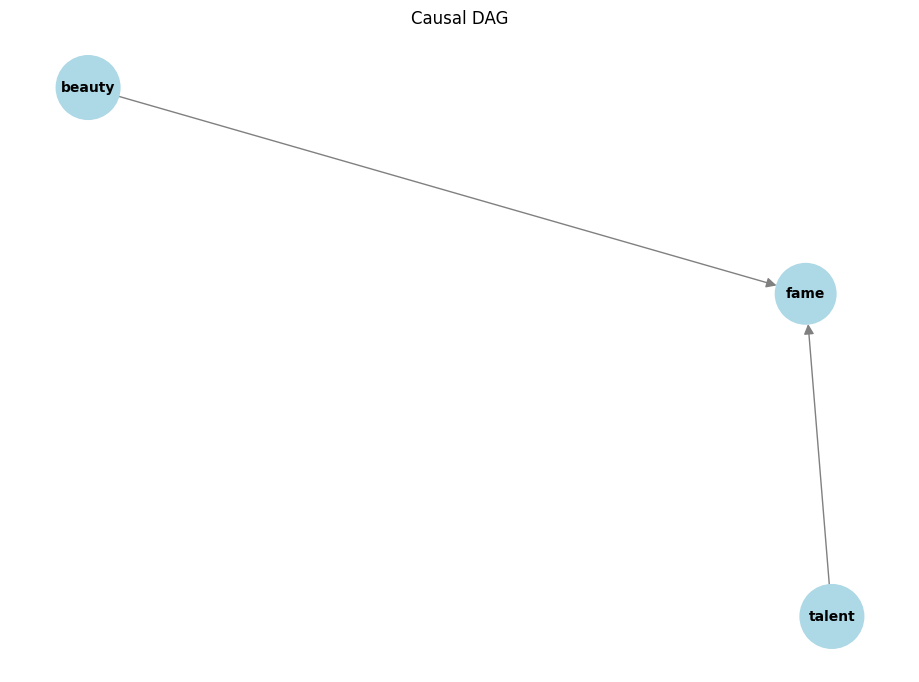

In [6]:
bayes_net.visualize(bn)

Let's examine the variables and their values. **IMPT: The names of your variables and values may differ from those shown here, depending on what the LLM actually outputs. When making the function calls below, you must change variable names and values to reflect your actual output from the previous LLM call.**

In [7]:
bn.values

[{'variable': 'talent', 'values': ['high', 'low']},
 {'variable': 'beauty', 'values': ['high', 'low']},
 {'variable': 'fame', 'values': ['famous', 'not famous']}]

Now, let's look at the conditional probability table over talent, given beauty.

In [8]:
bayes_net.get_conditional_probability_table(bn,'talent',
                                       ['beauty'])

,,beauty=high,beauty=low
0,high,0.598688,0.598688
1,low,0.401312,0.401312


As we can see, they are not correlated. But now suppose we look at the conditional probability table over talent, given both fame and beauty.

In [9]:
bayes_net.get_conditional_probability_table(bn,'talent',
                                       ['fame','beauty'])

,,beauty=high fame=famous,beauty=high fame=not famous,beauty=low fame=famous,beauty=low fame=not famous
0,high,0.712846,0.333865,0.816191,0.472716
1,low,0.287154,0.666135,0.183809,0.527284


If we restrict to just the cases where a person is famous, or just the cases where a person is not famous, it appears that beauty and talent are correlated, but in the opposite of the way one might expect. This is demonstrated more concretely by isolating just those columns of the dataframe:

In [10]:
df = bayes_net.get_conditional_probability_table(bn,'talent',
                                       ['fame','beauty'])
for col in df.columns:
  if "fame=not famous" in col:
    df.drop(columns=[col],inplace=True)

df

,,beauty=high fame=famous,beauty=low fame=famous
0,high,0.712846,0.816191
1,low,0.287154,0.183809


In [11]:
df = bayes_net.get_conditional_probability_table(bn,'talent',
                                       ['fame','beauty'])
for col in df.columns:
  if "fame=famous" in col:
    df.drop(columns=[col],inplace=True)

df

,,beauty=high fame=not famous,beauty=low fame=not famous
0,high,0.333865,0.472716
1,low,0.666135,0.527284


However, if we *intervene* on the fame variable, we do not induce a correlation between talent and beauty.

In [12]:
bayes_net.get_conditional_probability_table(bn,'talent',
                                       ['fame','beauty'],
                                            intervention=[{"variable":"fame",
                                                           "value":"famous"}])

,,beauty=high fame=famous,beauty=high fame=not famous,beauty=low fame=famous,beauty=low fame=not famous
0,high,0.598688,0.0,0.598688,0.0
1,low,0.401312,0.0,0.401312,0.0


In [13]:
bayes_net.get_conditional_probability_table(bn,'talent',
                                       ['fame','beauty'],
                                      intervention=[{"variable":"fame",
                                                        "value":"not famous"}])

,,beauty=high fame=famous,beauty=high fame=not famous,beauty=low fame=famous,beauty=low fame=not famous
0,high,0.0,0.598688,0.0,0.598688
1,low,0.0,0.401312,0.0,0.401312
